# Further questions

The conclusions answering our main questions open a path for more hypothesis. For example:

- Is our assumption also not met at a regional/local holiday level?
    - Exploring the Big Four
    - What about UK and NZ?
- Could we rank countries for their "love for chocolate"? 
    - The Cocoa Factor and Cocoa Crystals.

## Is our assumption also not met at a regional/local holiday level?

We saw that the national level holidays do not have a very strong correlation with a higher consumption of chocolate, which is reflected in sales from our dataset. But bigger countries with more decentralised state structures, where regions/states may have high degree of autonomy to determine the configuration of the holiday calendar, have many holidays we disregarded from our analysis. For example, India has only 3 national/federal level holidays out of the more than 200 registered in our datasets.

Let's have a look at those holidays and check whether regionality can be a determinant aspect for chocolate consumption and its reflect in the overall sales per country in our Big Four group:


- United States
- India
- Australia
- Canada

In [30]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv, dotenv_values
import os
import matplotlib.pyplot as plt


from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string
from sqlalchemy import Integer, String, Float, DateTime, Date

# Loading values from .env
config = dotenv_values()

# Define variables for the login
load_dotenv()
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
dbname = os.getenv("DB_NAME")
schema = os.getenv("DB_SCHEMA")

# PostgreSQL URL creation
url = f'postgresql://{user}:{password}@{host}:{port}/{dbname}'

# Create engine
engine = create_engine(url)


In [31]:
# Load table of sales
with engine.connect() as conn:
    conn.execute(text(f"SET search_path TO {schema}"))
    sales = pd.read_sql(
        text("SELECT * FROM jl_sales"),
        conn
    )

In [32]:
# Load holidays data

with engine.connect() as conn:
    conn.execute(text(f"SET search_path TO {schema}"))
    holidays_raw = pd.read_sql(
        text("SELECT * FROM jl_holiday_calendar"),
        conn
    )

# Filter out other countries and regional holidays

countries = ["GB","NZ","IN","US","CA","AU",]
holidays_countries = holidays_raw[holidays_raw["Country Code"].isin(countries)].copy()

keep_list = ["National Holiday", "Federal Holiday", "Bank Holiday", "Statutory Holiday", "Public Holiday"]
holidays = holidays_countries[~holidays_countries['Type'].isin(keep_list)] # Excludes the holidays in keep_list

holidays.head(5)

,Country,Country Code,Day,Date,Holiday Name,Type,Comments
0,india,IN,Saturday,2022-04-02,1st Navratra,Regional Holiday,Jammu and Kashmir
1,india,IN,Wednesday,2022-10-26,Accession Day,Regional Holiday,Jammu and Kashmir
2,australia,AU,Monday,2022-03-14,Adelaide Cup,Regional Holiday,2nd Monday in March. SA Only
3,india,IN,Tuesday,2022-08-09,Adivasi Divas,Regional Holiday,
4,india,IN,Monday,2022-09-26,Agarsain Jayanti,Regional Holiday,Several states


In [33]:
sales['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

/var/folders/48/t16ql6px73b6z62z8gt27g7r0000gn/T/ipykernel_3317/1147496919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays['Date'] = pd.to_datetime(holidays['Date'])


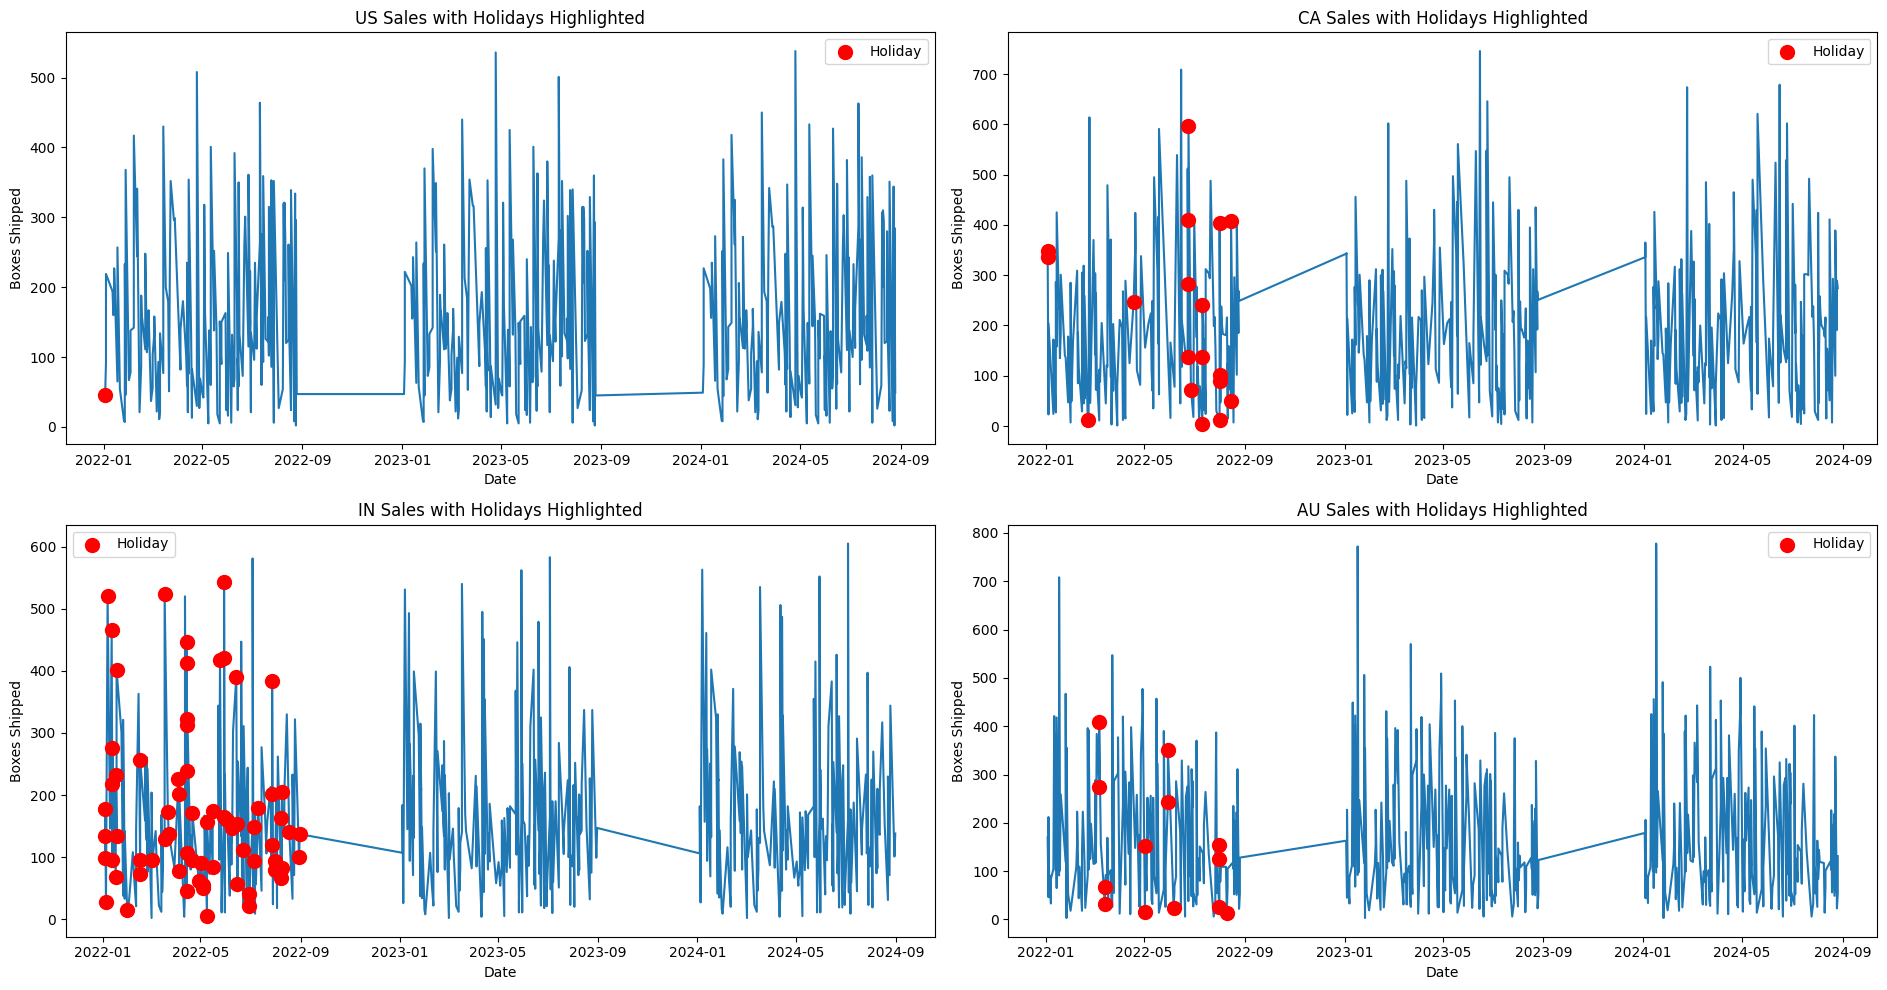

In [34]:
# Plots units (shipped boxes) vs date

# Date format
holidays['Date'] = pd.to_datetime(holidays['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])


fig, axes = plt.subplots(2, 2, figsize=(19, 10))

# =========================
# US
# =========================
ax = axes[0, 0]

us_sales = sales[sales['Country'] == 'USA'].copy()
us_sales['Date'] = pd.to_datetime(us_sales['Date'])

sns.lineplot(
    data=us_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

us_holidays = holidays[holidays['Country Code'] == 'US'].copy()
us_holidays['Date'] = pd.to_datetime(us_holidays['Date'])

us_holiday_data = us_sales[us_sales['Date'].isin(us_holidays['Date'])]

ax.scatter(
    us_holiday_data['Date'],
    us_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('US Sales with Holidays Highlighted')
ax.legend()



# =========================
# Canada
# =========================
ax = axes[0, 1]

ca_sales = sales[sales['Country'] == 'Canada'].copy()
ca_sales['Date'] = pd.to_datetime(ca_sales['Date'])

sns.lineplot(
    data=ca_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

ca_holidays = holidays[holidays['Country Code'] == 'CA'].copy()
ca_holidays['Date'] = pd.to_datetime(ca_holidays['Date'])

ca_holiday_data = ca_sales[ca_sales['Date'].isin(ca_holidays['Date'])]

ax.scatter(
    ca_holiday_data['Date'],
    ca_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('CA Sales with Holidays Highlighted')
ax.legend()




# =========================
# India
# =========================
ax = axes[1, 0]

in_sales = sales[sales['Country'] == 'India'].copy()
in_sales['Date'] = pd.to_datetime(in_sales['Date'])

sns.lineplot(
    data=in_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

in_holidays = holidays[holidays['Country Code'] == 'IN'].copy()
in_holidays['Date'] = pd.to_datetime(in_holidays['Date'])

in_holiday_data = in_sales[in_sales['Date'].isin(in_holidays['Date'])]

ax.scatter(
    in_holiday_data['Date'],
    in_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('IN Sales with Holidays Highlighted')
ax.legend()



# =========================
# Australia
# =========================
ax = axes[1, 1]

au_sales = sales[sales['Country'] == 'Australia'].copy()
au_sales['Date'] = pd.to_datetime(au_sales['Date'])

sns.lineplot(
    data=au_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

au_holidays = holidays[holidays['Country Code'] == 'AU'].copy()
au_holidays['Date'] = pd.to_datetime(au_holidays['Date'])

au_holiday_data = au_sales[au_sales['Date'].isin(au_holidays['Date'])]

ax.scatter(
    au_holiday_data['Date'],
    au_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('AU Sales with Holidays Highlighted')
ax.legend()


plt.tight_layout()
plt.show()



/var/folders/48/t16ql6px73b6z62z8gt27g7r0000gn/T/ipykernel_3317/2181924951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays['Date'] = pd.to_datetime(holidays['Date'])


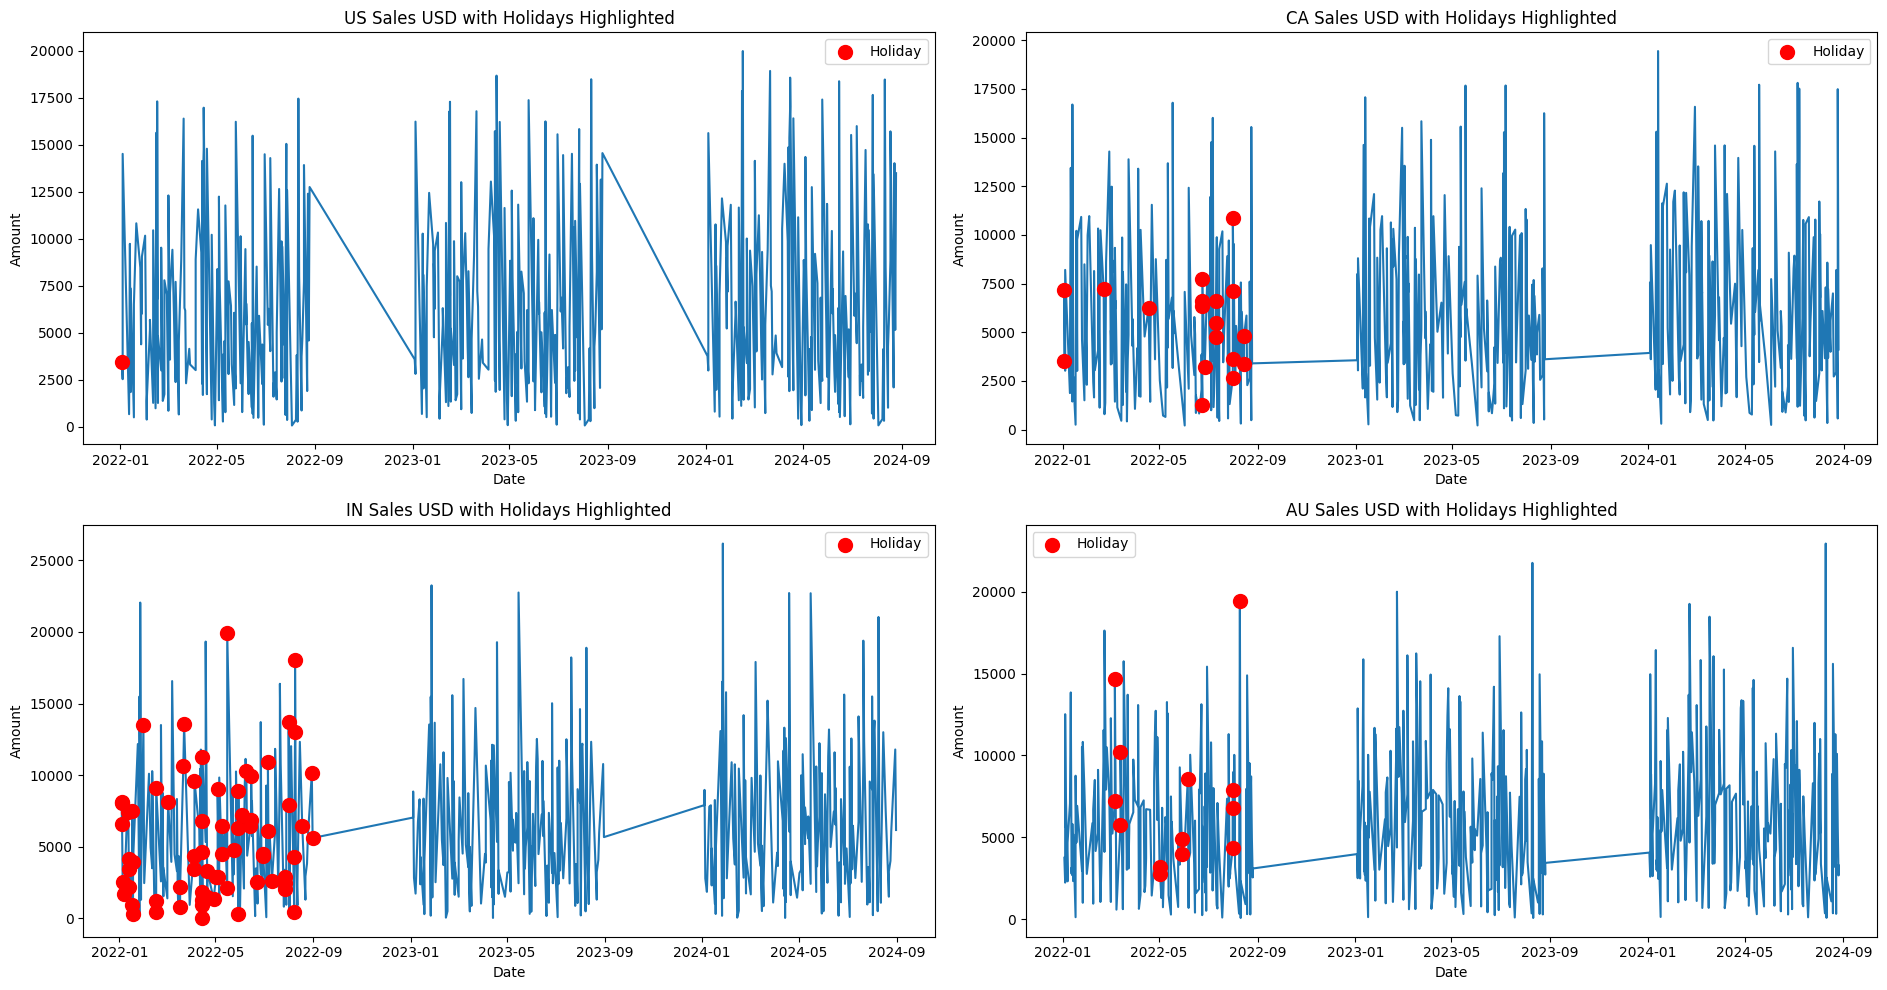

In [35]:
# Plots sales (amount USD) vs date

# Date format
holidays['Date'] = pd.to_datetime(holidays['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

us_holidays = holidays[holidays['Country'] == 'US']

fig, axes = plt.subplots(2, 2, figsize=(19, 10))

# =========================
# US
# =========================
ax = axes[0, 0]

us_sales = sales[sales['Country'] == 'USA'].copy()
us_sales['Date'] = pd.to_datetime(us_sales['Date'])

sns.lineplot(
    data=us_sales,
    x='Date',
    y='Amount',
    ax=ax,
    estimator = None
)

us_holidays = holidays[holidays['Country Code'] == 'US'].copy()
us_holidays['Date'] = pd.to_datetime(us_holidays['Date'])

us_holiday_data = us_sales[us_sales['Date'].isin(us_holidays['Date'])]

ax.scatter(
    us_holiday_data['Date'],
    us_holiday_data['Amount'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('US Sales USD with Holidays Highlighted')
ax.legend()



# =========================
# Canada
# =========================
ax = axes[0, 1]

ca_sales = sales[sales['Country'] == 'Canada'].copy()
ca_sales['Date'] = pd.to_datetime(ca_sales['Date'])

sns.lineplot(
    data=ca_sales,
    x='Date',
    y='Amount',
    ax=ax,
    estimator = None
)

ca_holidays = holidays[holidays['Country Code'] == 'CA'].copy()
ca_holidays['Date'] = pd.to_datetime(ca_holidays['Date'])

ca_holiday_data = ca_sales[ca_sales['Date'].isin(ca_holidays['Date'])]

ax.scatter(
    ca_holiday_data['Date'],
    ca_holiday_data['Amount'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('CA Sales USD with Holidays Highlighted')
ax.legend()




# =========================
# India
# =========================
ax = axes[1, 0]

in_sales = sales[sales['Country'] == 'India'].copy()
in_sales['Date'] = pd.to_datetime(in_sales['Date'])

sns.lineplot(
    data=in_sales,
    x='Date',
    y='Amount',
    ax=ax,
    estimator = None
)

in_holidays = holidays[holidays['Country Code'] == 'IN'].copy()
in_holidays['Date'] = pd.to_datetime(in_holidays['Date'])

in_holiday_data = in_sales[in_sales['Date'].isin(in_holidays['Date'])]

ax.scatter(
    in_holiday_data['Date'],
    in_holiday_data['Amount'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('IN Sales USD with Holidays Highlighted')
ax.legend()



# =========================
# Australia
# =========================
ax = axes[1, 1]

au_sales = sales[sales['Country'] == 'Australia'].copy()
au_sales['Date'] = pd.to_datetime(au_sales['Date'])

sns.lineplot(
    data=au_sales,
    x='Date',
    y='Amount',
    ax=ax,
    estimator = None
)

au_holidays = holidays[holidays['Country Code'] == 'AU'].copy()
au_holidays['Date'] = pd.to_datetime(au_holidays['Date'])

au_holiday_data = au_sales[au_sales['Date'].isin(au_holidays['Date'])]

ax.scatter(
    au_holiday_data['Date'],
    au_holiday_data['Amount'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('AU Sales USD with Holidays Highlighted')
ax.legend()


plt.tight_layout()
plt.show()



Most of the conclusions will be the same as applied to the national holidays:

- Holidays appear only in the period for 2022 as the retrieved, exact holidays belong to that year.
- For the case of USA, only one out of five regional/state holidays has resulted in sales.
- Like for the country level holidays, we can see the sales are distributed evenly, with no clear seasonality during the year.
- Holidays are arranged in a similar way, without being placed in a peak of sales, or the previous days of that peak of sales as we could expect. Regional holidays analysis does not suggest a big contribution or impact in the total country sales, in both amount of money and units sold.
- Also here, patterns of chocolate sales are similar across the three years, and are not strongly affected by variations in the price of cocoa. Several reasons for this, including possible changes in product composition.

- The data is not supporting the idea that regional holidays are main drivers of the chocolate sales in the country also.

# What about the United Kingdom and New Zealand then?

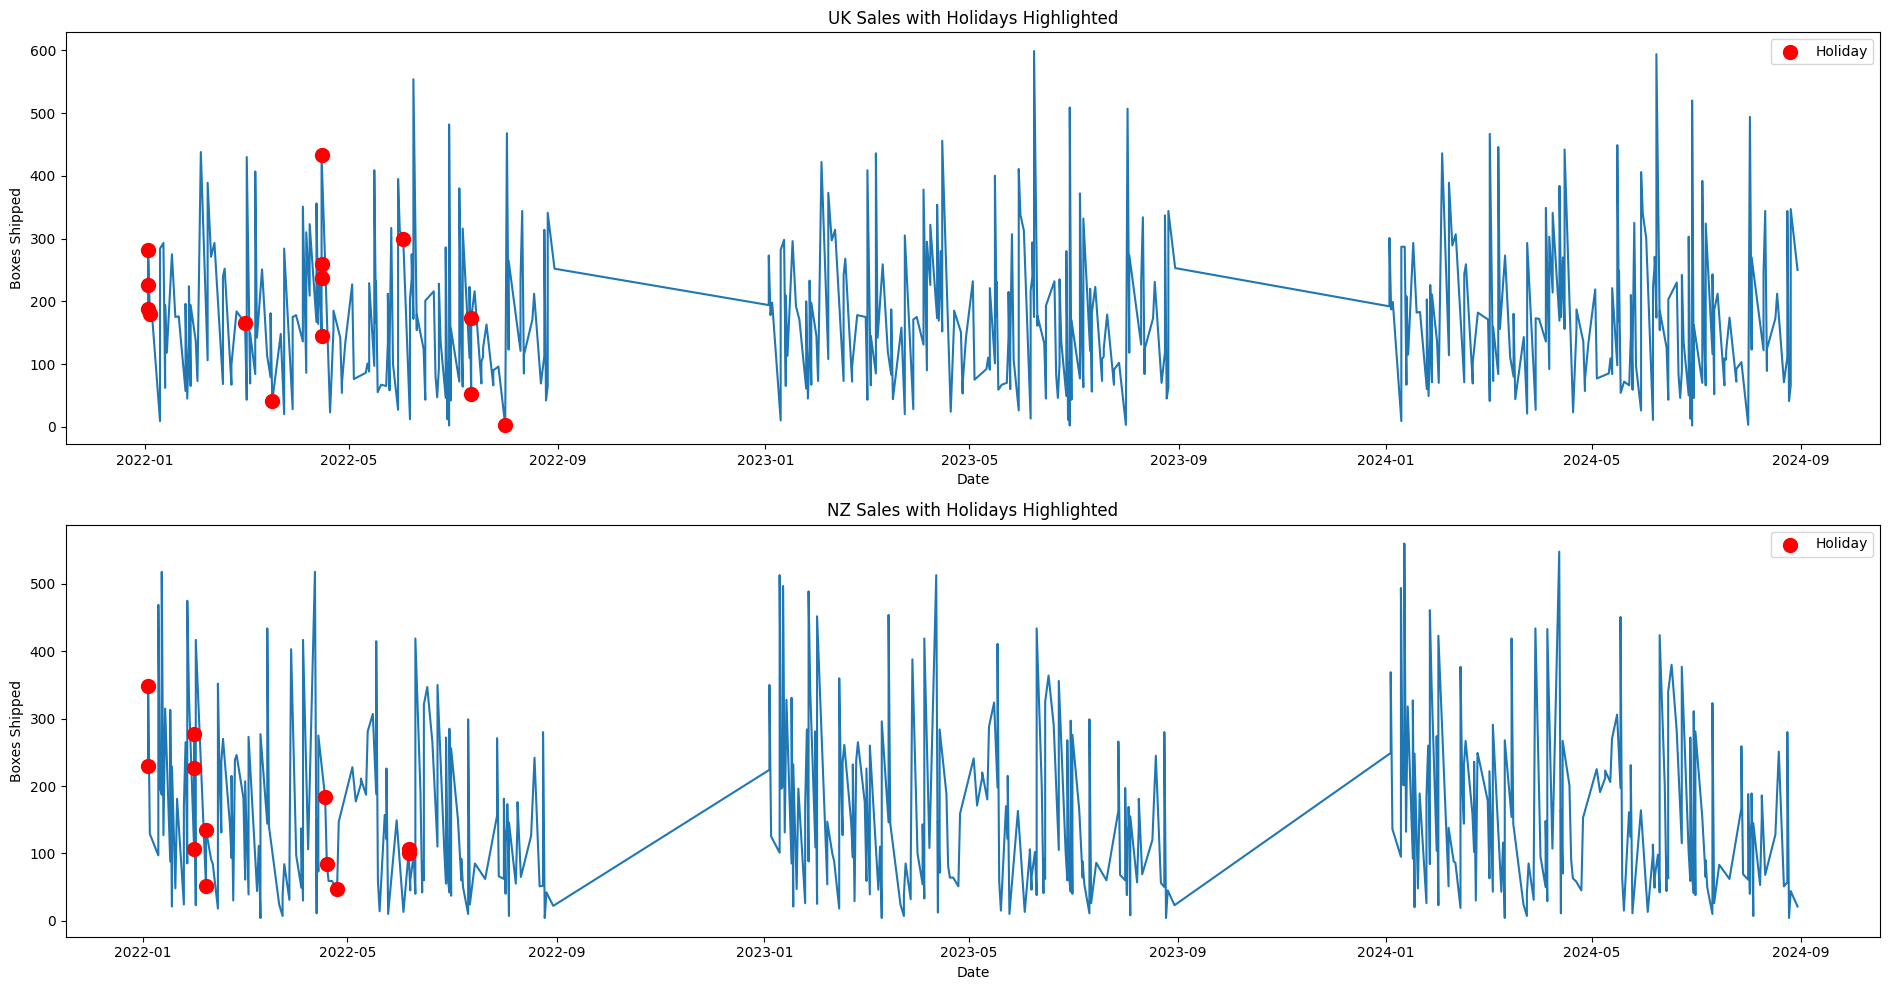

In [36]:
# Plots units (shipped boxes) vs date

# Date format
holidays_countries['Date'] = pd.to_datetime(holidays_countries['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])


fig, axes = plt.subplots(2, 1, figsize=(19, 10))

# =========================
# United Kingdom
# =========================
ax = axes[0]

uk_sales = sales[sales['Country'] == 'UK'].copy()
uk_sales['Date'] = pd.to_datetime(uk_sales['Date'])

sns.lineplot(
    data=uk_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

uk_holidays = holidays_countries[holidays_countries['Country Code'] == 'GB'].copy()
uk_holidays['Date'] = pd.to_datetime(uk_holidays['Date'])

uk_holiday_data = uk_sales[uk_sales['Date'].isin(uk_holidays['Date'])]

ax.scatter(
    uk_holiday_data['Date'],
    uk_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('UK Sales with Holidays Highlighted')
ax.legend()



# =========================
# New Zealand
# =========================
ax = axes[1]

nz_sales = sales[sales['Country'] == 'New Zealand'].copy()
nz_sales['Date'] = pd.to_datetime(nz_sales['Date'])

sns.lineplot(
    data=nz_sales,
    x='Date',
    y='Boxes Shipped',
    ax=ax,
    estimator = None
)

nz_holidays = holidays_countries[holidays_countries['Country Code'] == 'NZ'].copy()
nz_holidays['Date'] = pd.to_datetime(nz_holidays['Date'])

nz_holiday_data = nz_sales[nz_sales['Date'].isin(nz_holidays['Date'])]

ax.scatter(
    nz_holiday_data['Date'],
    nz_holiday_data['Boxes Shipped'],
    s=100,
    color='red',
    zorder=3,
    label='Holiday'
)

ax.set_title('NZ Sales with Holidays Highlighted')
ax.legend()


plt.tight_layout()
plt.show()



Looking at the graphs again, a similar situation happens with all holidays in UK and NZ. We are not finding a trend at first glance that can lead us to think the holidays, either national or regional, have a big impact on sales with a clear correlation.

# Could we rank countries for their "love for chocolate"?

We established in the EDA a ranking for the countries, with New Zealand and Australia in last and first position in sales.

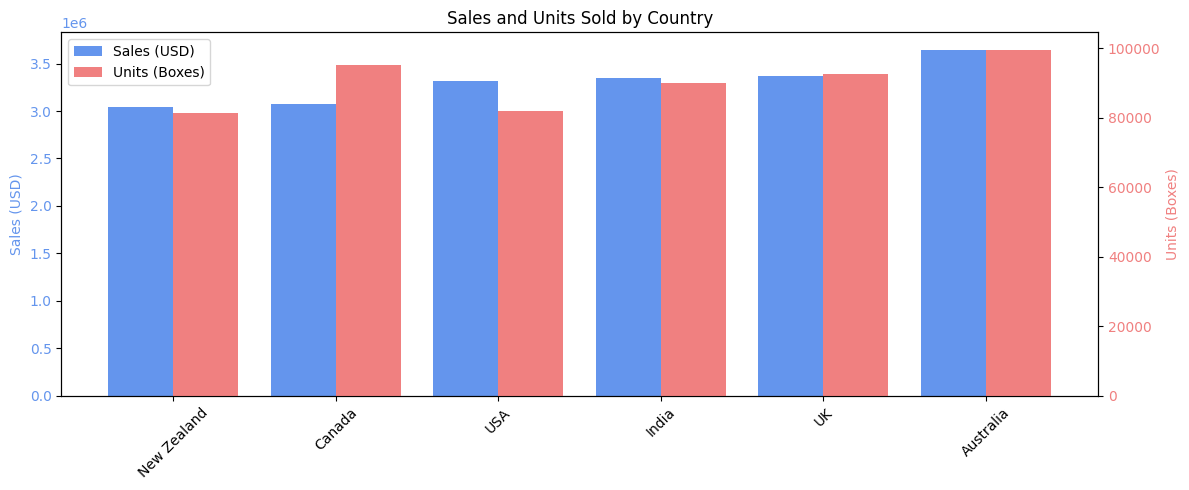

Can we look into the types of chocolate that are more loved by market then?

In [37]:
sales['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [38]:
sales_amount = (
    sales.groupby(['Country', 'Product'], as_index=False)['Amount']
         .sum()
)
sales_amount


,Country,Product,Amount
0,Australia,50% Dark Bites,280066.82
1,Australia,70% Dark Bites,127540.46
2,Australia,85% Dark Bars,123398.33
3,Australia,99% Dark & Pure,176247.62
4,Australia,After Nines,89658.71
...,...,...,...
127,USA,Peanut Butter Cubes,106387.74
128,USA,Raspberry Choco,265127.63
129,USA,Smooth Sliky Salty,144840.22
130,USA,Spicy Special Slims,81749.75


In [39]:
sales_box = (
    sales.groupby(['Country', 'Product'], as_index=False)['Boxes Shipped']
         .sum()
)

sales_box

,Country,Product,Boxes Shipped
0,Australia,50% Dark Bites,9692
1,Australia,70% Dark Bites,6389
2,Australia,85% Dark Bars,3649
3,Australia,99% Dark & Pure,4116
4,Australia,After Nines,2731
...,...,...,...
127,USA,Peanut Butter Cubes,3666
128,USA,Raspberry Choco,4570
129,USA,Smooth Sliky Salty,4065
130,USA,Spicy Special Slims,4212


## The Cocoa Factor and Cocoa Crystals

An index has been created for ranking countries called __The Cocoa Factor (TCF)__. TCF is measured in units called __Cocoa Crystals__, which represent the degree of preference for cocoa-rich products.

There are two types of products: those with a specified cocoa percentage (e.g., 50%, 70%, 85%, 99%) and other chocolate products without a percentage listed. The TCF ranking is calculated as the sum of sales weighted by cocoa percentage, divided by total sales (either in USD or units).

The cocoa percentage is extracted from the product name, allowing new products with different cocoa contents to be included automatically. Products without a listed percentage are treated as having a weight of zero, since their cocoa content is not relevant for the ranking calculation.


The theoretical range of values for TCF goes from 0 to 1, which is 0 to 100 in the case of crystals. 
- The maximum of the scale is found where a product with 100% content cocoa is sold, and a country is buying exclusively this product. 
- The minimum, however, would be assigned to a country that will not buy any chocolate-derived product indicating specifically the cocoa content, this is, the cocoa would not play a substantial role in the consumer's decision.

Applying this to the case study with our dataset, the highest cocoa percentage in a product is the 99% Dark & Pure chocolate. The sales with the current catalogue are expected to generate a TCF ceiling of 99 crystals for the countries.

In [43]:
# Sales per amount USD 

sales_amount = sales_amount.reset_index(drop=True)

# Extract ponderation factor
sales_amount['weight'] = (
    sales_amount['Product']
      .str.extract(r'(\d+)')
      .astype(float)
      .div(100)
      .fillna(0)
)

# Calculate ponderated variable
sales_amount['weighted_amount'] = sales_amount['Amount'] * sales_amount['weight']

# Group per country and TCF degrees
tcf_sales_amount = (
    sales_amount.groupby('Country')
      .agg(weighted_sum=('weighted_amount', 'sum'),
           total_sales_amount=('Amount', 'sum'))
)

tcf_sales_amount['TCF'] = tcf_sales_amount['weighted_sum'] / tcf_sales_amount['total_sales_amount']

# Convert to Cocoa Crystals (0–100)
tcf_sales_amount['Cocoa_Crystals'] = tcf_sales_amount['TCF'] * 100


print(sales_amount)
print(tcf_sales_amount)



       Country              Product     Amount  weight  weighted_amount
0    Australia       50% Dark Bites  280066.82    0.50      140033.4100
1    Australia       70% Dark Bites  127540.46    0.70       89278.3220
2    Australia        85% Dark Bars  123398.33    0.85      104888.5805
3    Australia      99% Dark & Pure  176247.62    0.99      174485.1438
4    Australia          After Nines   89658.71    0.00           0.0000
..         ...                  ...        ...     ...              ...
127        USA  Peanut Butter Cubes  106387.74    0.00           0.0000
128        USA      Raspberry Choco  265127.63    0.00           0.0000
129        USA   Smooth Sliky Salty  144840.22    0.00           0.0000
130        USA  Spicy Special Slims   81749.75    0.00           0.0000
131        USA           White Choc  217393.74    0.00           0.0000

[132 rows x 5 columns]
             weighted_sum  total_sales_amount       TCF  Cocoa_Crystals
Country                                 

In [45]:
# Sales per boxes shipped

sales_box = sales_box.reset_index(drop=True)

# Extract ponderation factor
sales_box['weight'] = (
    sales_box['Product']
      .str.extract(r'(\d+)')
      .astype(float)
      .div(100)
      .fillna(0)
)

# Calculate ponderated variable
sales_box['weighted_box'] = sales_box['Boxes Shipped'] * sales_box['weight']

# Group per country and TCF degrees
tcf_sales_box = (
    sales_box.groupby('Country')
      .agg(weighted_sum=('weighted_box', 'sum'),
           total_sales_box=('Boxes Shipped', 'sum'))
)

tcf_sales_box['TCF'] = tcf_sales_box['weighted_sum'] / tcf_sales_box['total_sales_box']

# Convert to Cocoa Crystals (0–100)
tcf_sales_box['Cocoa_Crystals'] = tcf_sales_box['TCF'] * 100

print(sales_box)
print(tcf_sales_box)

       Country              Product  Boxes Shipped  weight  weighted_box
0    Australia       50% Dark Bites           9692    0.50       4846.00
1    Australia       70% Dark Bites           6389    0.70       4472.30
2    Australia        85% Dark Bars           3649    0.85       3101.65
3    Australia      99% Dark & Pure           4116    0.99       4074.84
4    Australia          After Nines           2731    0.00          0.00
..         ...                  ...            ...     ...           ...
127        USA  Peanut Butter Cubes           3666    0.00          0.00
128        USA      Raspberry Choco           4570    0.00          0.00
129        USA   Smooth Sliky Salty           4065    0.00          0.00
130        USA  Spicy Special Slims           4212    0.00          0.00
131        USA           White Choc           3638    0.00          0.00

[132 rows x 5 columns]
             weighted_sum  total_sales_box       TCF  Cocoa_Crystals
Country                        

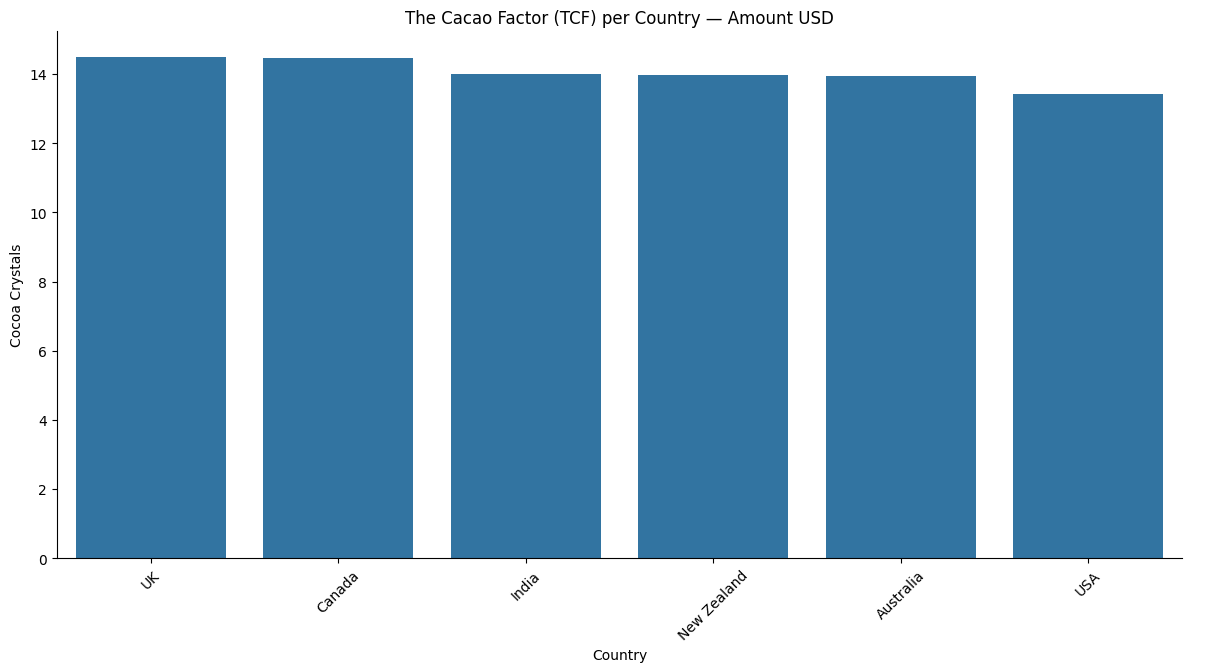

       Country              Product     Amount  weight  weighted_amount
0    Australia       50% Dark Bites  280066.82    0.50      140033.4100
1    Australia       70% Dark Bites  127540.46    0.70       89278.3220
2    Australia        85% Dark Bars  123398.33    0.85      104888.5805
3    Australia      99% Dark & Pure  176247.62    0.99      174485.1438
4    Australia          After Nines   89658.71    0.00           0.0000
..         ...                  ...        ...     ...              ...
127        USA  Peanut Butter Cubes  106387.74    0.00           0.0000
128        USA      Raspberry Choco  265127.63    0.00           0.0000
129        USA   Smooth Sliky Salty  144840.22    0.00           0.0000
130        USA  Spicy Special Slims   81749.75    0.00           0.0000
131        USA           White Choc  217393.74    0.00           0.0000

[132 rows x 5 columns]


In [49]:
order_amount = tcf_sales_amount.sort_values('Cocoa_Crystals', ascending=False).index


sns.catplot(
    x='Country',
    y='Cocoa_Crystals',
    kind='bar',
    data=tcf_sales_amount,
    order=order_amount,
    height=6,
    aspect=2 
)

plt.xticks(rotation=45)
plt.ylabel('Cocoa Crystals')
plt.title('The Cacao Factor (TCF) per Country — Amount USD')
plt.show()

print(sales_amount)

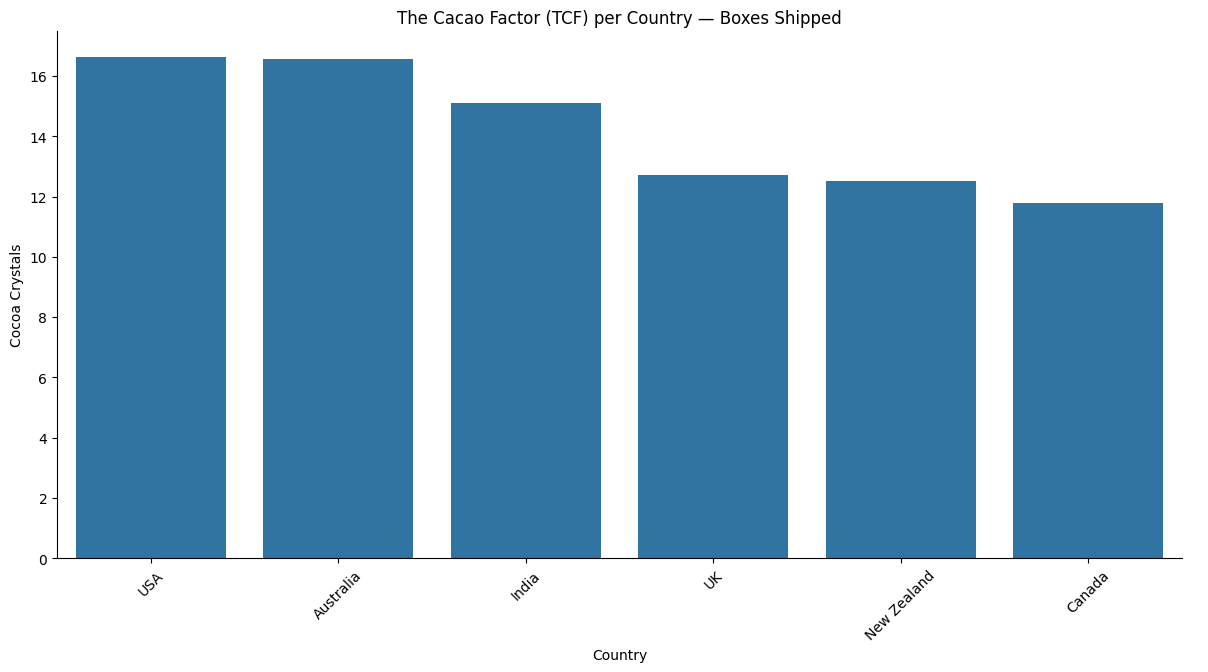

             weighted_sum  total_sales_box       TCF  Cocoa_Crystals
Country                                                             
Australia        16494.79            99618  0.165580       16.558042
Canada           11223.74            95158  0.117948       11.794846
India            13592.45            89968  0.151081       15.108094
New Zealand      10191.40            81350  0.125278       12.527843
UK               11772.83            92523  0.127242       12.724220
USA              13620.21            81820  0.166466       16.646553


In [48]:
order_box = tcf_sales_box.sort_values('Cocoa_Crystals', ascending=False).index

sns.catplot(
    x='Country',
    y='Cocoa_Crystals',
    kind='bar',
    data=tcf_sales_box,
    order=order_box,
    height=6,
    aspect=2 
)

plt.xticks(rotation=45)
plt.ylabel('Cocoa Crystals')
plt.title('The Cacao Factor (TCF) per Country — Boxes Shipped')
plt.show()

print(tcf_sales_box)



Cocoa Crystals values vary more when measured by boxes shipped than by USD sales. This makes boxes shipped a more suitable parameter for comparing countries from a market perspective. One advantage of this approach is that new markets can be added to the ranking regardless of country size, population, or total sales. TCF reflects a country’s preference for cocoa-enriched products, considering only products where cocoa content is relevant to consumer choice.

- When calculated using USD sales, Cocoa Crystals provide valuable internal insight for the company, as they reflect revenue-weighted performance and commercial impact. 
- When calculated using boxes shipped, Cocoa Crystals are more appropriate for analyzing market behavior, as they better capture underlying consumption patterns independent of pricing effects.

As mentioned above, TCF can be easily updated as new countries are added or as new products are included in the company catalogue.